<a href="https://colab.research.google.com/github/boybanggia/DataAnalystDeepLearning/blob/main/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def load_data(filename):
  return pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/covid19/'+filename)
dfcovid19 = load_data('countriessample.csv')
dfcovid19.head()

,Date,CountryRegion,Confirmed,Recovered,Deaths
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0
1,1/22/2020,Greece;Europe,NaN,NaN,0.0
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0
3,1/22/2020,India;Asia,0.0,NaN,0.0
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0


**Example 1:**

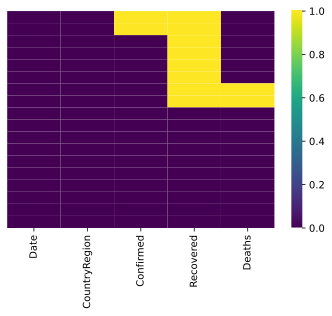

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(dfcovid19.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

**Example 2:**

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
})

# print the dataframe
print("The original dataframe:\n")
print(df)

# function to be applied
def get_mean(scores):
    return sum(scores)/len(scores)

# get the mean score for each subject
result = df.apply(get_mean)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

   History  Math  English
0       76    81       72
1       84    67       93
2       68    91       84
3       94    86       76

The result of applying the function on the dataframe:

History    80.50
Math       81.25
English    81.25
dtype: float64


**Example 3**: Apply a function to each row (axis = 1) of the dataframe

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
}, index=['Sam', 'Greta', 'Mike', 'Emma'])

# print the dataframe
print("The original dataframe:\n")
print(df)

# function to be applied
def get_mean(scores):
    return sum(scores)/len(scores)

# get the mean score for each student
result = df.apply(get_mean, axis=1)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

       History  Math  English
Sam         76    81       72
Greta       84    67       93
Mike        68    91       84
Emma        94    86       76

The result of applying the function on the dataframe:

Sam      76.333333
Greta    81.333333
Mike     81.000000
Emma     85.333333
dtype: float64


**Example 4:** Define function to split CountryRegion into country and region

In [ ]:
def split_name_series(string):
  country, region=string.split(';')
  return pd.Series(
      (country, region),
      index='country, region'.split()
  )

In [ ]:

def split_name(x_df):
    # Select the Name column and apply a function
    res=x_df['CountryRegion'].apply(split_name_series)
    x_df[res.columns]=res
    return x_df

**Example 5**: Split CountryRegion into country and region by using slip_name function in example 4

In [ ]:
res=load_data('countriessample.csv').pipe(split_name)
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,Africa
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,Europe
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,Europe
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,Asia
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,Asia
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,Asia
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,Asia
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,Europe
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,Africa
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,South America


**Example 6:**

In [ ]:
def substitute_region(x_df):
    mapping={'Africa':'AF', 'Asia':'AS','Europe':'EU','South America':'SA','North America':'NA'}
    x_df['region']=x_df['region'].map(mapping)
    return x_df

In [ ]:
res=(res.pipe(substitute_region))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA


**Example 7:** Discretize into three equal-sized bins

In [ ]:
import pandas as pd
import numpy as np
a = pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

In [ ]:
a

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

**Example 8**:Discovers the same bins, but assign them specific labels. Notice that the returned Categorical’s categories are labels and is ordered

In [ ]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]),bins = 3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

**Example 9:** ordered=False will result in unordered categories when labels are passed. This parameter can be used to allow non-unique labels:

In [ ]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,labels=["B", "A", "B"], ordered=False)

['B', 'B', 'A', 'A', 'B', 'B']
Categories (2, object): ['A', 'B']

**Example 10:** Convert confirmed cases into 3 catorories: normal (<3000), medium ( <5000), and worst (>5000)

In [ ]:
def create_evaluation_group(x_df):
    bins=[0.0, 3000, 5000, sys.maxsize]
    labels=['normal', 'medium', 'worst']
    evaluationGroup=pd.cut(x_df['Confirmed'], bins=bins, labels=labels,include_lowest=True)
    x_df['Evaluation']=evaluationGroup
    return x_df
    

**Nội dung: Trực quan hóa dữ liệu điểm thi đã được xử lý processed_dulieuxettuyendaihoc.csv Mục tiêu: Sinh viên đạt được kiến thức sau**.

1.Trình bày dữ liệu cơ bản

2.Trực quan hóa dữ liệu cơ bản

In [3]:
# Khai báo các thư viên
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
Dataframe = pd.read_csv("https://raw.githubusercontent.com/trungluu1711/phantichdulieuvahocsau/master/processed_dulieuxettuyendaihoc.csv", index_col = "STT")
print(Dataframe)

      T1   L1   H1   S1   V1   X1  ...  XL2  XL3  US_TMN1  US_TMN2  US_TMN3  KQXT
STT                                ...                                           
1    7.2  7.3  6.3  7.3  7.0  7.9  ...    K    K    2.800    3.016    2.824   0.0
2    5.4  3.9  3.9  4.0  5.4  5.4  ...   TB    Y    1.876    2.188    1.880   0.0
3    5.6  6.8  7.2  7.5  4.3  7.4  ...   TB    Y    2.308    2.152    1.732   1.0
4    6.6  6.4  5.3  6.9  5.4  7.3  ...   TB   TB    2.484    2.080    2.412   0.0
5    6.0  5.0  6.0  7.3  6.5  7.7  ...   TB    K    2.600    2.544    2.804   0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...      ...      ...      ...   ...
96   8.6  6.9  7.4  8.8  7.6  5.8  ...    K    K    2.972    2.968    2.816   0.0
97   3.7  5.4  6.0  5.1  5.5  3.9  ...   TB    Y    1.972    2.060    1.912   0.0
98   8.8  5.5  7.4  7.7  6.2  7.3  ...    K    K    2.820    3.136    3.168   1.0
99   2.7  1.8  3.4  5.3  4.5  7.9  ...    Y   TB    1.660    1.888    2.464   0.0
100  4.1  5.2  4

**Phần 1:**

1.Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần

In [5]:
Dataframe.sort_values(by=['DH1'])

,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TMN1,US_TMN2,US_TMN3,KQXT
STT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54,4.9,5.9,6.2,5.6,5.9,5.0,7.0,5.6,6.1,7.1,6.4,6.0,6.3,5.5,6.2,6.6,2.5,4.8,5.0,5.0,4.5,2.4,5.8,3.7,6.2,4.1,4.4,5.2,4.1,6.3,4.9,4.6,4.9,5.2,4.9,5.5,5.5,4.6,5.5,5.4,6.5,7.5,6.1,5.6,5.2,5.7,5.6,6.3,M,0.0,1,1.00,5.50,4.25,A,5.69,6.26,4.07,TB,TB,Y,2.276,2.504,1.628,0.0
44,6.6,7.2,5.9,6.9,7.6,8.1,7.3,6.7,6.3,6.9,6.0,6.4,7.0,7.1,6.9,6.2,6.7,7.1,5.4,6.8,6.8,5.9,6.6,6.8,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,5.8,5.9,5.8,4.6,6.6,4.0,6.0,6.2,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,F,1.0,2,1.25,3.50,5.00,D1,7.05,6.61,6.56,K,K,K,2.820,2.644,2.624,0.0
73,5.5,6.6,7.2,7.6,5.5,6.7,6.7,5.2,6.0,6.8,6.3,7.2,4.9,4.8,6.6,5.3,4.6,5.5,5.5,7.1,5.2,6.1,7.1,5.4,5.2,4.7,5.8,6.3,5.7,5.6,5.2,5.3,5.2,5.5,6.3,6.6,6.1,6.5,5.3,5.2,6.1,6.2,7.3,7.8,5.5,5.9,6.3,5.5,M,0.0,1,1.50,4.50,5.50,A,6.20,5.88,5.63,TB,TB,TB,2.480,2.352,2.252,0.0
6,9.3,7.6,7.9,8.6,7.0,7.3,7.7,7.9,9.6,7.8,8.0,8.7,7.7,8.0,9.2,9.1,7.1,8.5,8.1,8.7,7.2,8.4,7.7,8.2,8.5,8.5,7.7,9.2,8.0,6.6,7.3,8.8,8.5,7.6,8.1,9.0,8.4,6.6,6.6,8.2,7.8,6.4,7.2,7.7,7.7,5.7,8.0,7.8,M,0.0,1,1.50,4.00,6.00,D1,7.96,8.54,7.82,K,G,K,3.184,3.416,3.128,0.0
88,7.3,4.3,5.3,5.8,4.9,3.7,5.6,5.3,5.9,6.0,6.3,5.9,5.0,6.6,6.6,4.6,7.1,6.3,7.3,6.7,6.5,5.4,6.7,5.5,7.7,5.4,7.5,7.1,6.8,5.8,6.8,6.5,7.9,5.9,5.9,5.9,5.7,6.1,6.8,6.7,6.6,6.4,6.9,5.7,6.4,6.4,7.2,6.2,M,0.0,1,1.75,4.00,4.50,A,5.44,5.78,6.51,TB,TB,K,2.176,2.312,2.604,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,8.4,7.4,6.0,7.8,6.3,7.2,8.5,6.0,9.3,7.0,8.5,8.8,6.9,6.9,7.3,6.8,7.4,7.0,8.0,7.5,7.1,6.7,8.4,5.8,7.7,6.7,8.2,7.5,7.5,6.1,8.1,6.5,8.2,5.9,7.9,8.6,6.1,5.1,7.2,6.1,8.6,7.8,8.9,8.5,6.7,5.5,7.9,6.6,M,0.0,1,6.50,4.50,8.00,A,7.23,7.77,7.24,K,K,K,2.892,3.108,2.896,1.0
12,7.9,7.0,9.1,8.6,6.1,7.0,5.6,9.0,8.2,7.1,8.8,7.6,6.9,7.3,7.2,9.0,8.1,8.4,8.5,7.6,5.5,8.0,6.6,8.6,6.9,7.0,8.9,8.6,5.6,5.3,7.1,8.3,8.0,7.8,8.6,7.3,6.2,3.9,5.7,8.6,8.1,7.9,8.3,7.9,6.4,6.4,6.7,8.7,M,0.0,2,6.75,6.50,4.25,D1,7.43,7.72,7.49,K,K,K,2.972,3.088,2.996,1.0
24,5.3,6.3,5.7,6.9,5.9,7.5,6.6,5.1,6.4,6.9,4.7,7.4,6.1,8.4,6.4,4.4,6.1,5.8,5.1,7.4,6.7,7.1,6.7,4.3,5.0,3.5,4.5,7.3,6.1,8.8,7.9,3.9,5.3,5.5,6.3,6.7,6.7,7.5,6.7,4.5,6.1,6.8,6.4,6.4,7.6,8.8,6.1,5.2,M,0.0,2NT,6.75,5.25,5.00,C,6.05,6.32,6.20,TB,TB,TB,2.420,2.528,2.480,1.0
